# Task_4_(Dataset reducer)

In [81]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk
mnist = tk.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


There are 60000 images in training dataset
There are 10000 images in training dataset
___________________


(28, 28)
Randomly printing 10 images with labels from training dataset
index: 49464
Lable: 9


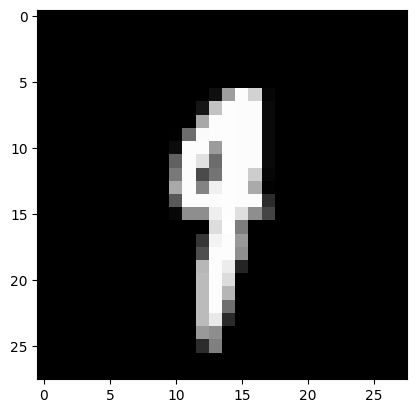

index: 16004
Lable: 7


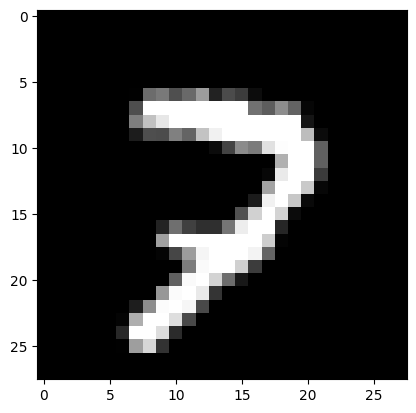

index: 14200
Lable: 3


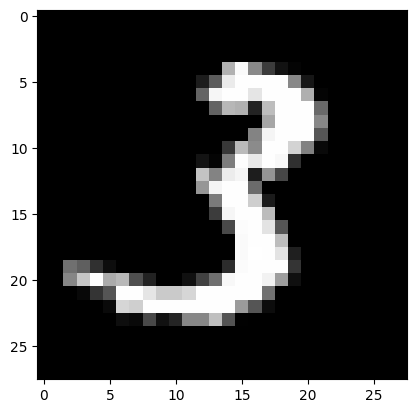

index: 30018
Lable: 7


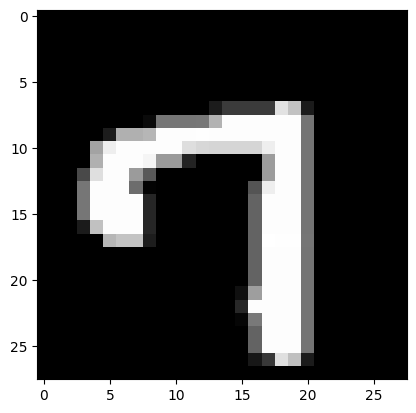

index: 48646
Lable: 4


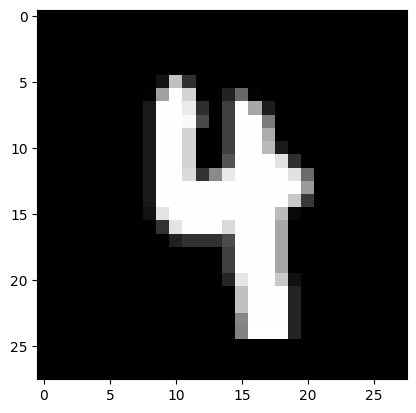

index: 56535
Lable: 3


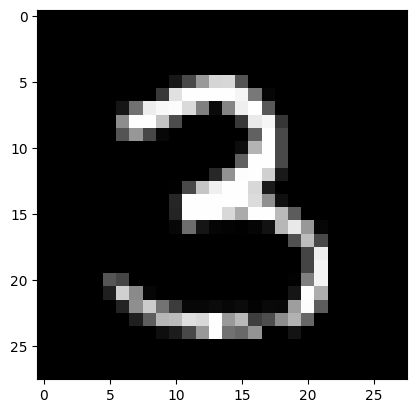

index: 6451
Lable: 5


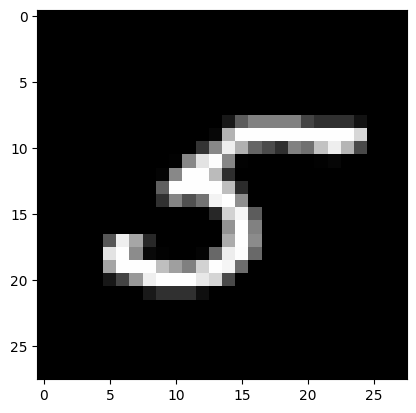

index: 14389
Lable: 5


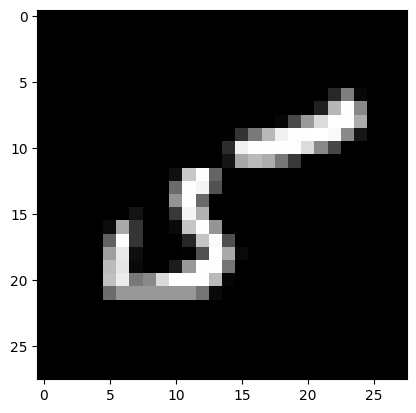

index: 9432
Lable: 7


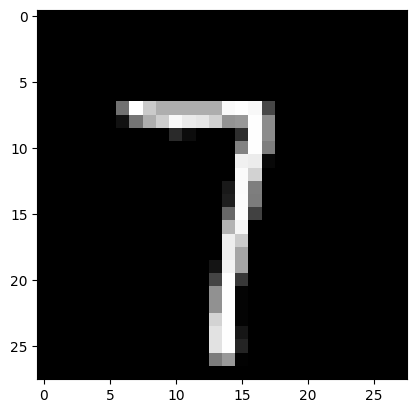

index: 36740
Lable: 3


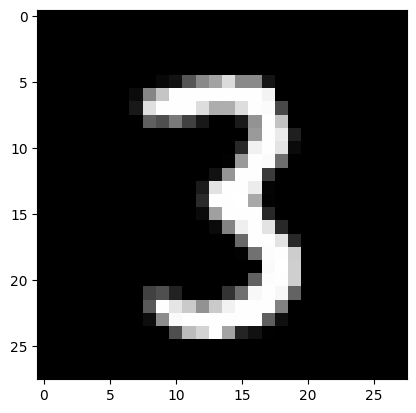

___________________


Randomly printing 10 images with labels from testing dataset
index: 9783
Lable: 4


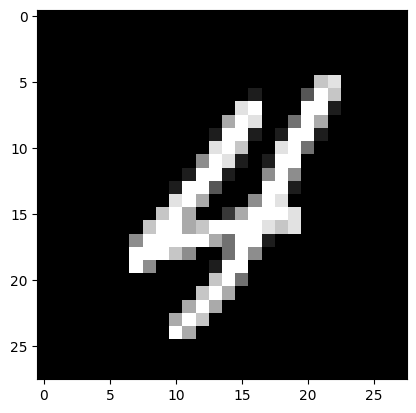

index: 9926
Lable: 8


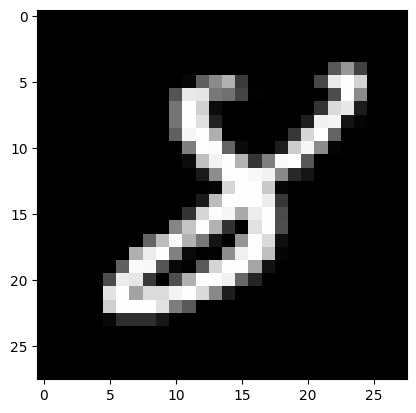

index: 5140
Lable: 3


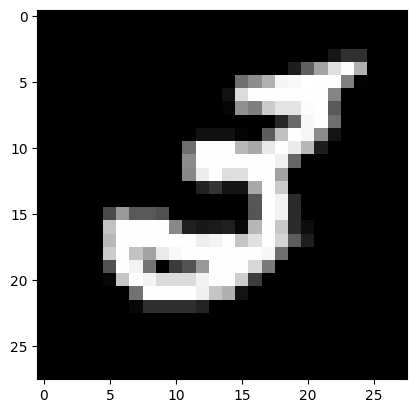

index: 6043
Lable: 5


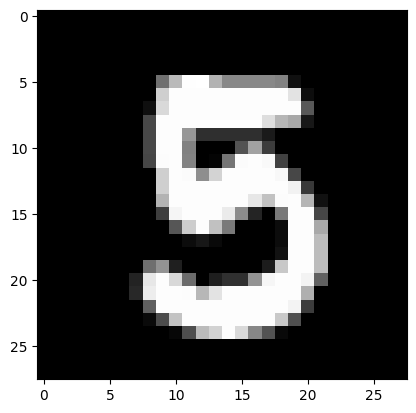

index: 5364
Lable: 5


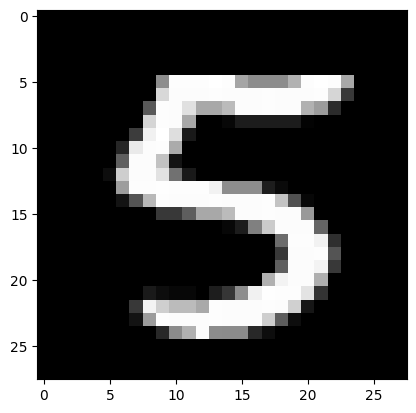

index: 9644
Lable: 7


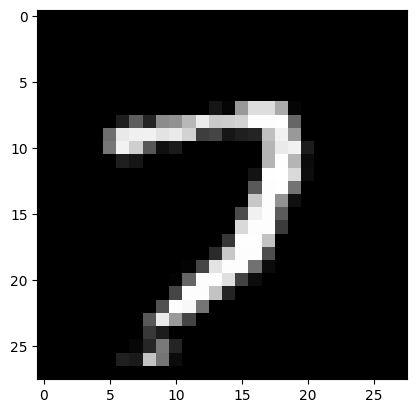

index: 409
Lable: 1


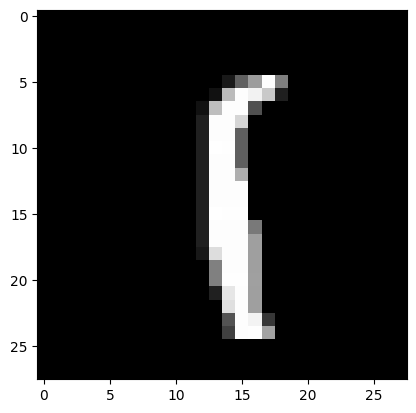

index: 9018
Lable: 2


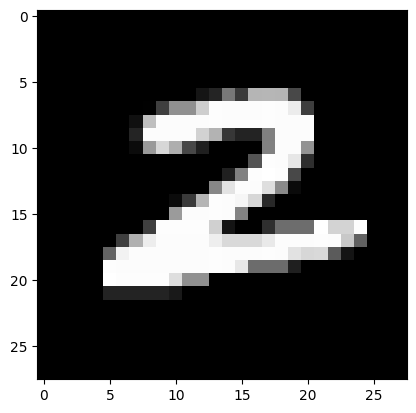

index: 1483
Lable: 1


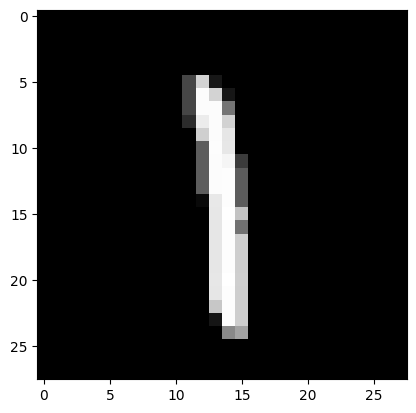

index: 5082
Lable: 4


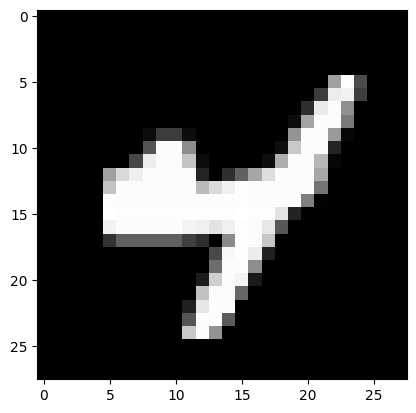

___________________


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [82]:
# Loading dataset
dataset = keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Each image is of shape 28x28
print(dataset[0][0][0].shape)
# print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[1])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")





## Code  to reduce dataset:

In [83]:
# For training dataset
reduced_train_img = []
reduced_train_label = []
for i in range(10):
    # From current label, get all images
    get_indxes = np.where(dataset[0][1] == i)[0]
    select_img = random.sample(list(get_indxes), 600)
    # Add the selected images to the new training dataset
    reduced_train_img.extend(dataset[0][0][select_img])
    reduced_train_label.extend(dataset[0][1][select_img])

    
# For testing dataset
reduced_test_img = []
reduced_test_label = []
for i in range(10):
    get_indxes = np.where(dataset[1][1] == i)[0]
    # Randomly select 100 images
    select_img = random.sample(list(get_indxes), 100)
    reduced_test_img.extend(dataset[1][0][select_img])
    reduced_test_label.extend(dataset[1][1][select_img])

In [84]:
# change tuple to np array
reduced_train_img = np.array(reduced_train_img)
reduced_train_label = np.array(reduced_train_label)

reduced_test_img = np.array(reduced_test_img)
reduced_test_label = np.array(reduced_test_label)

## Merge both tuples to validate dataset:

In [85]:
new_dataset = ((reduced_train_img,reduced_train_label),(reduced_test_img,reduced_test_label))

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 750
Lable: 1


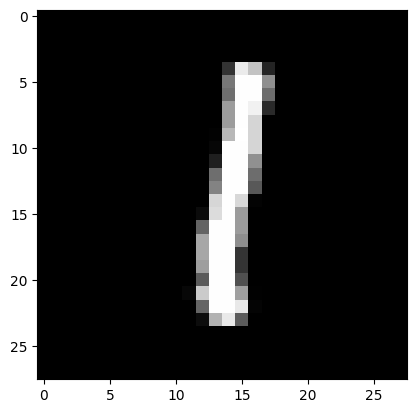

index: 1072
Lable: 1


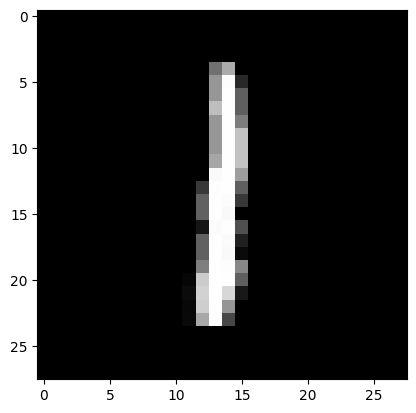

index: 1217
Lable: 2


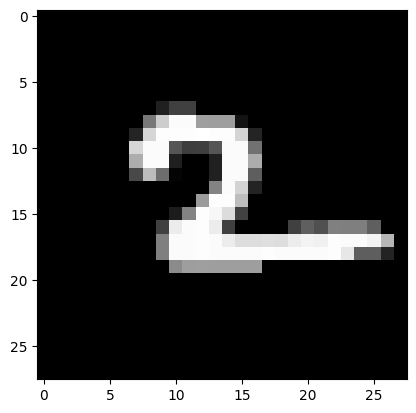

index: 2948
Lable: 4


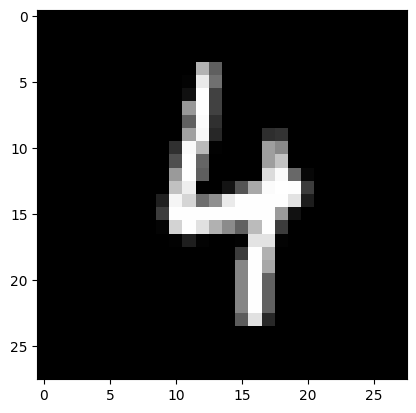

index: 1896
Lable: 3


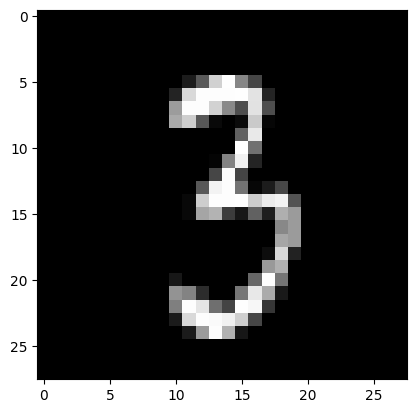

index: 857
Lable: 1


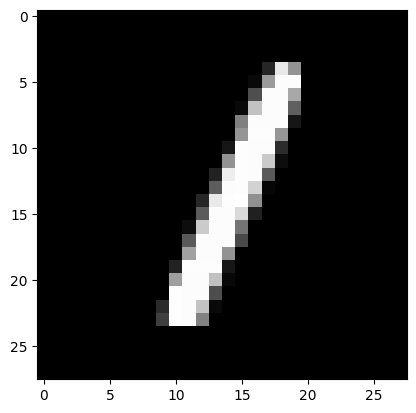

index: 3194
Lable: 5


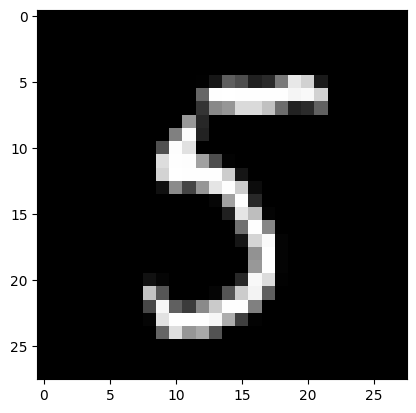

index: 3465
Lable: 5


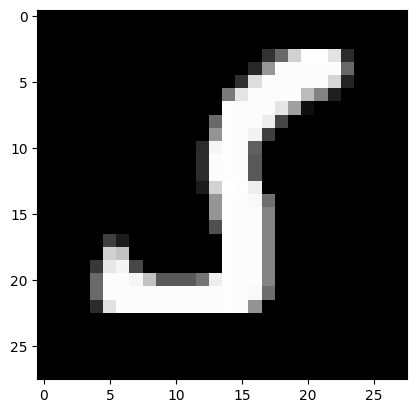

index: 5038
Lable: 8


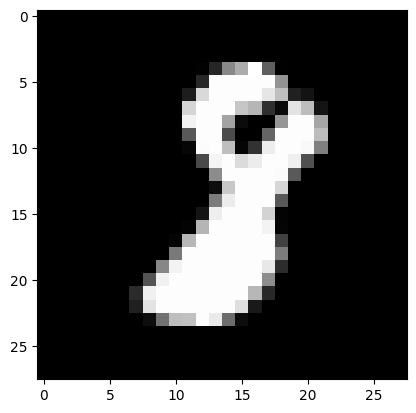

index: 5153
Lable: 8


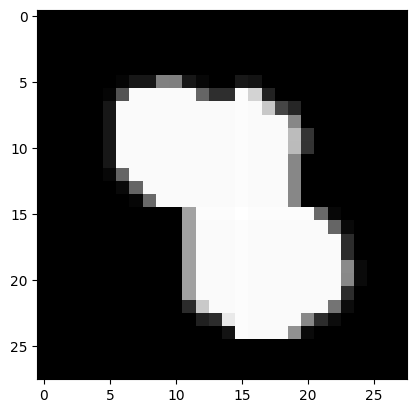

___________________


Randomly printing 10 images with labels from testing dataset
index: 4527
Lable: 7


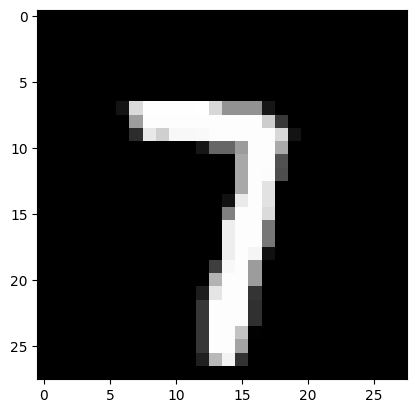

index: 5720
Lable: 9


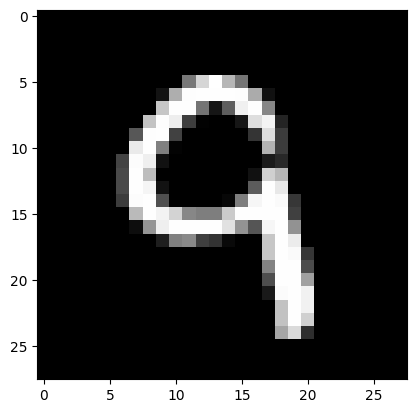

index: 4092
Lable: 6


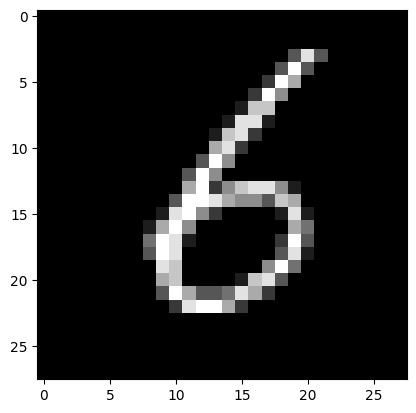

index: 5941
Lable: 9


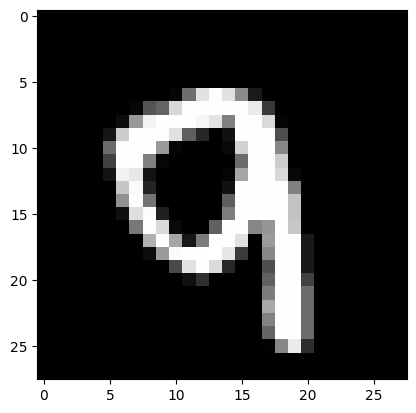

index: 2272
Lable: 3


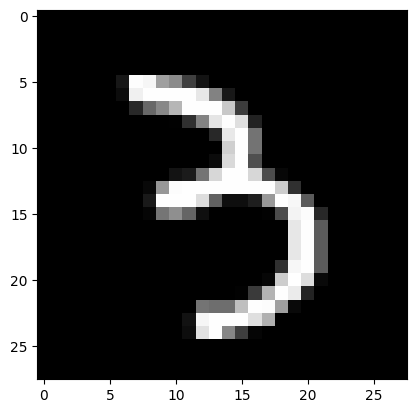

index: 4038
Lable: 6


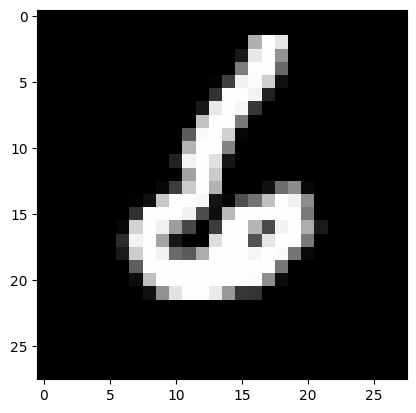

index: 2043
Lable: 3


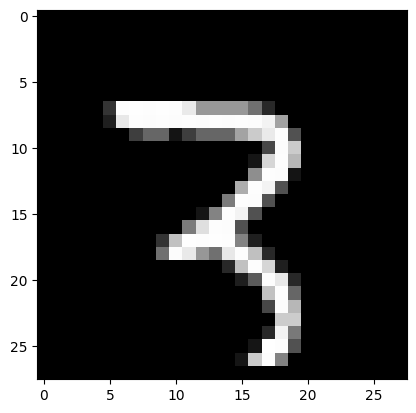

index: 5915
Lable: 9


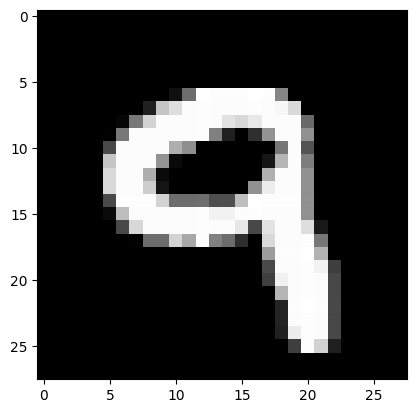

index: 2540
Lable: 4


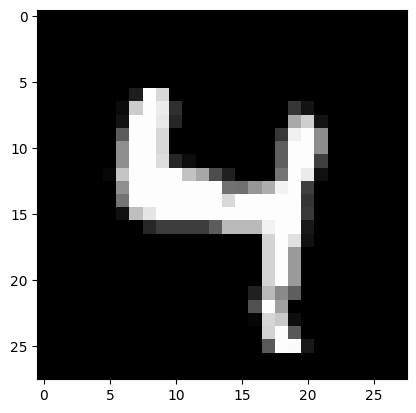

index: 5709
Lable: 9


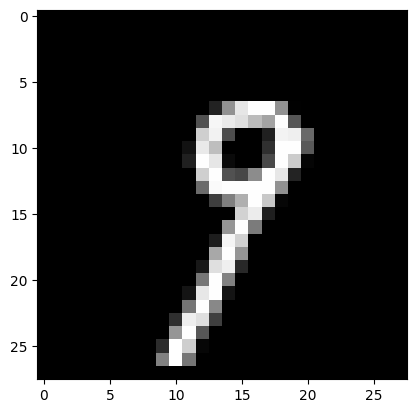

___________________




In [86]:
# Checking the shape of first image in new training dataset
print(new_datset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
